In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data set

df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [3]:
# Information about Data set Metadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Data set size

df.shape

(2240, 28)

In [5]:
# Removing the special character from data set column names

df.columns = df.columns.str.strip()

In [6]:
# After Removing the Column Names

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
# Checking the Null Values

df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
Education               0
Year_Birth              0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
# Data set Descriptive Stats Numerical Columns

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Creating the Age Column based on Year_Birth

df['Age'] = 2025-df['Year_Birth']

### Univariate Analysis
> It is only Analysis ***one Variable at a time*** to Understand
> - Distribution
> - Central tendency
> - Spread
> - Frequency patterns
> - Outliers

### Numerical Univariate Analysis Non-Visulization

In [18]:
# Descriptive Statistics

df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [19]:
# Skewness
df['Income'].skew()

np.float64(6.763487372811116)

In [20]:
# Kurtosis
df['Income'].kurtosis()

np.float64(159.63669957780044)

In [21]:
# Missing Values
df['Income'].isnull().sum()

np.int64(24)

In [22]:
# Missing Values Percentage(%)
df['Income'].isnull().mean()*100

np.float64(1.0714285714285714)

In [24]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Income'] < Q1 - 1.5*IQR) | 
              (df['Income'] > Q3 + 1.5*IQR)]
len(outliers)


8

### Numerical Univariate Analysis Visualization

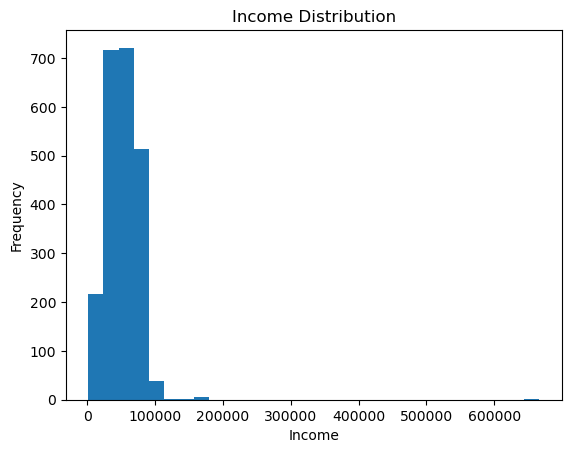

In [25]:
# Histogram

plt.hist(df['Income'], bins=30)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()


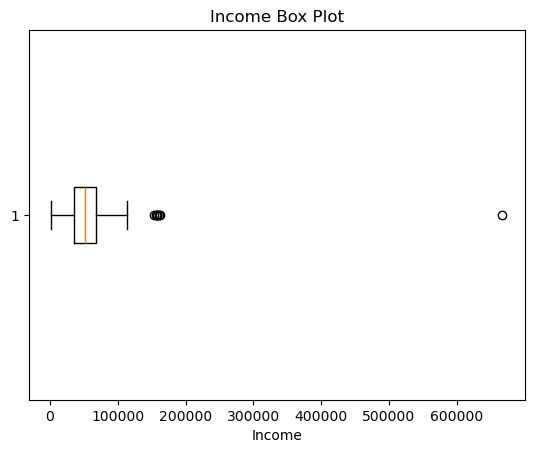

In [28]:
# Boxplot

income = pd.to_numeric(df['Income'], errors='coerce')
income = income.dropna()

plt.boxplot(income, vert=False)
plt.xlabel("Income")
plt.title("Income Box Plot")
plt.show()


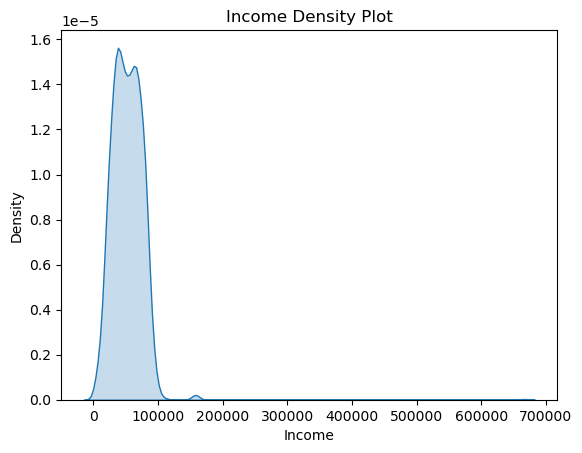

In [27]:

sns.kdeplot(df['Income'], fill=True)
plt.title("Income Density Plot")
plt.show()


## Categorical Columns

### Categorical Columns Univariate Non Visualization

In [30]:
# Frequency Count

df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [31]:
# Percentage Distribution

df['Education'].value_counts(normalize=True) * 100

Education
Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: proportion, dtype: float64

In [35]:
# Unique Categories

A = df['Country'].nunique()
B = df['Country'].unique()
print('Unique values NO:',A)
print('\nUnique Values :',B)

Unique values NO: 8

Unique Values : ['Spain' 'Canada' 'USA' 'Australia' 'Germany' 'India' 'Saudi Arabia'
 'Mexico']


In [36]:
# Checking the Missing values

df['Education'].isnull().sum()

np.int64(0)

### Categorical Columns Univariate Visualization

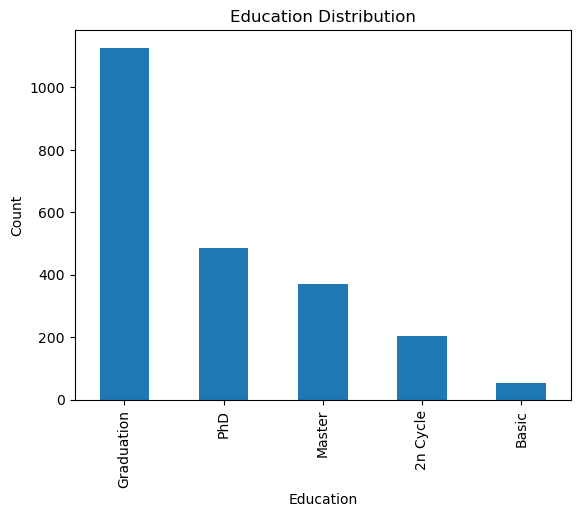

In [37]:
# Bar Chart

df['Education'].value_counts().plot(kind='bar')
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education Distribution")
plt.show()

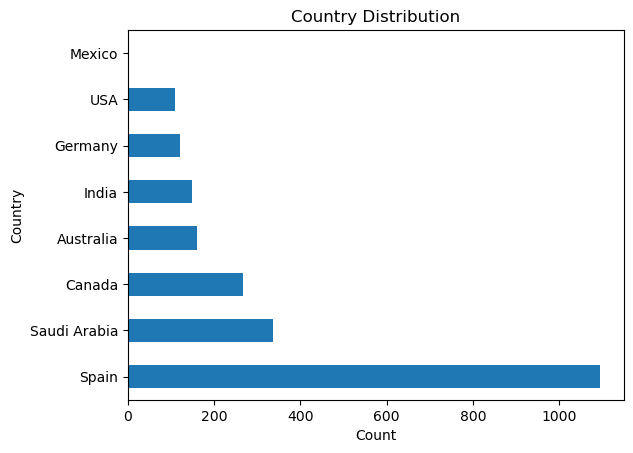

In [38]:
# Horizontal Bar Chart (Better for many categories)

df['Country'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Country Distribution")
plt.show()

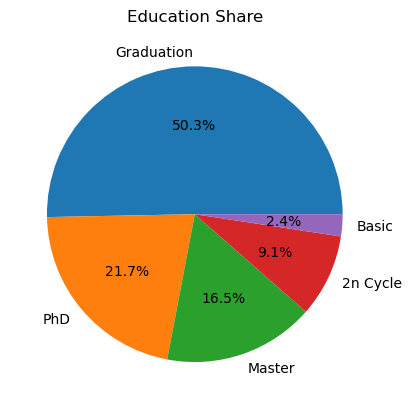

In [39]:
# Pie Chart (Use only for small categories)

df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Education Share")
plt.ylabel("")
plt.show()

# Bivariate Analysis

***Bivariate Analysis*** studies the ***relationship between two variables*** to identify patterns, associations, or differences.

### Numerical–Numerical (Non-Visualization)

In [41]:
# Correlation

df[['Age', 'Income']].corr()

,Age,Income
Age,1.000000,0.161791
Income,0.161791,1.000000


***Interpretation***

- +1 → Strong positive relationship
- −1 → Strong negative relationship
- 0 → No linear relationship

In [42]:
# Covariance

df[['Age', 'Income']].cov()

,Age,Income
Age,143.617921,4.881462e+04
Income,48814.621201,6.336838e+08


***Use:*** Direction of relationship (not strength)

### Numerical–Numerical (Visualization)

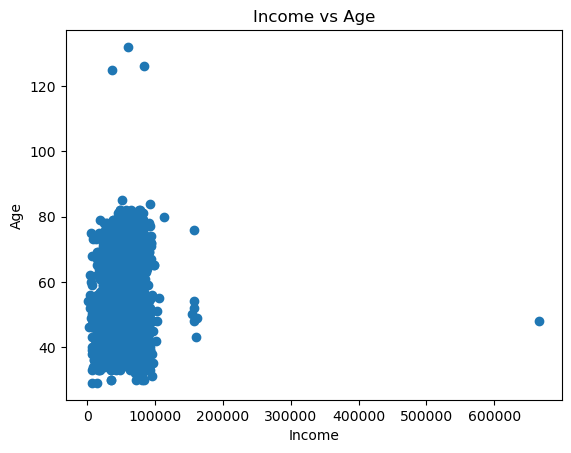

In [44]:
# Scatter Plot

plt.scatter(df['Income'], df['Age'])
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Income vs Age")
plt.show()

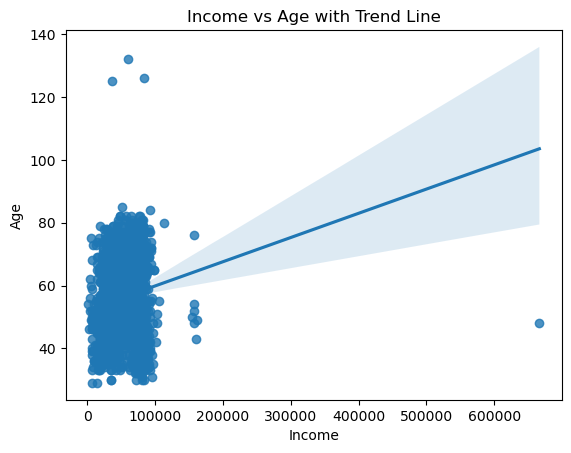

In [45]:
# Regression Line

sns.regplot(x='Income', y='Age', data=df)
plt.title("Income vs Age with Trend Line")
plt.show()


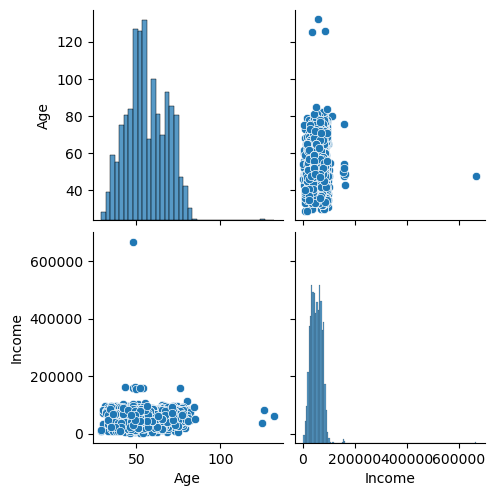

In [46]:
# Pair Plot (Multiple Numerical Relationships)

sns.pairplot(df[['Age', 'Income']])
plt.show()

### Categorical vs Numerical

### Categorical–Numerical (Non-Visualization)

In [47]:
# Grouped Statistics

df.groupby('Education')['Income'].mean()

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [48]:
df.groupby('Education')['Age'].mean()

Education
2n Cycle      52.975369
Basic         47.537037
Graduation    55.364685
Master        58.121622
PhD           58.956790
Name: Age, dtype: float64

In [49]:
# Multiple Aggregations

df.groupby('Education')['Income'].agg(['mean', 'median', 'min', 'max', 'count'])

,mean,median,min,max,count
Education,,,,,
2n Cycle,47633.190000,46805.0,7500.0,96547.0,200
Basic,20306.259259,20744.0,7500.0,34445.0,54
Graduation,52720.373656,52028.5,1730.0,666666.0,1116
Master,52917.534247,50943.0,6560.0,157733.0,365
PhD,56145.313929,55212.0,4023.0,162397.0,481


### Categorical–Numerical (Visualization)

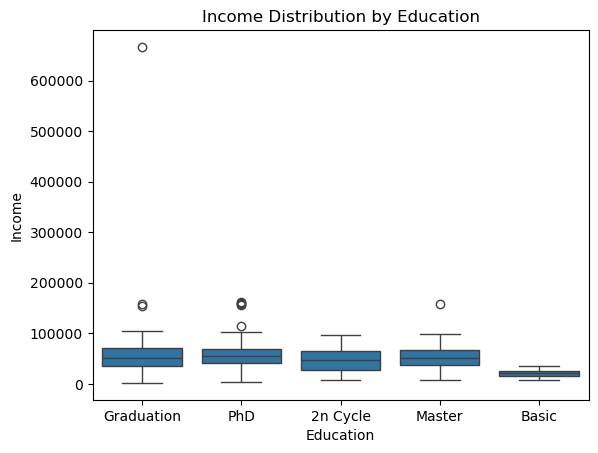

In [50]:
# Box Plot

sns.boxplot(x='Education', y='Income', data=df)
plt.title("Income Distribution by Education")
plt.show()

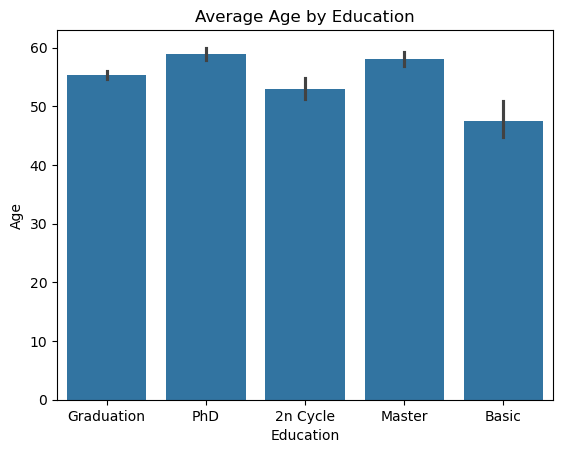

In [51]:
# Bar Plot (Mean Value)

sns.barplot(x='Education', y='Age', data=df)
plt.title("Average Age by Education")
plt.show()

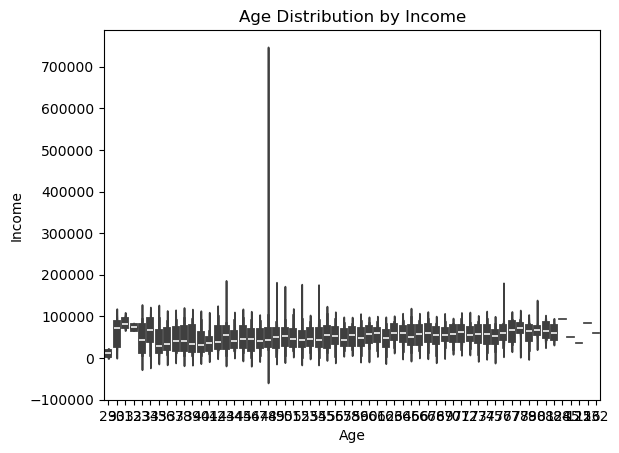

In [54]:
# Violin Plot (Advanced Distribution)

sns.violinplot(x='Age', y='Income', data=df)
plt.title("Age Distribution by Income")
plt.show()

## Categorical vs Categorical

### Categorical–Categorical (Non-Visualization)

In [56]:
# Cross Tabulation

pd.crosstab(df['Age'], df['Response'])

Response,0,1
Age,,
29,1,1
30,4,1
31,2,1
32,3,2
33,12,1
34,11,4
35,14,4
36,29,1
37,27,2


In [57]:
# Percentage Cross Table
pd.crosstab(df['Age'], df['Response'], normalize='index') * 100

Response,0,1
Age,,
29,50.000000,50.000000
30,80.000000,20.000000
31,66.666667,33.333333
32,60.000000,40.000000
33,92.307692,7.692308
34,73.333333,26.666667
35,77.777778,22.222222
36,96.666667,3.333333
37,93.103448,6.896552


### Categorical–Categorical (Visualization)

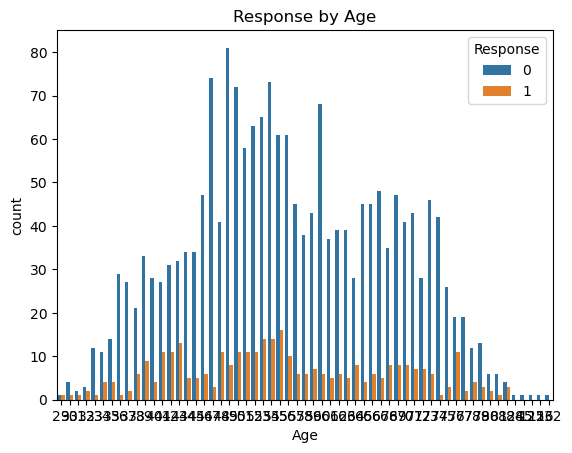

In [59]:
# Count Plot

sns.countplot(x='Age', hue='Response', data=df)
plt.title("Response by Age")
plt.show()

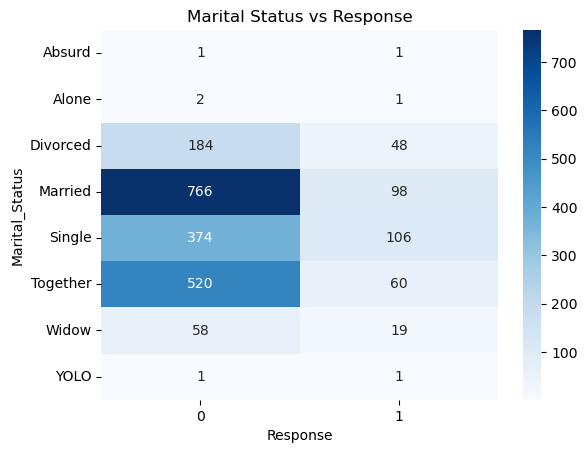

In [60]:
# Heatmap

ct = pd.crosstab(df['Marital_Status'], df['Response'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title("Marital Status vs Response")
plt.show()

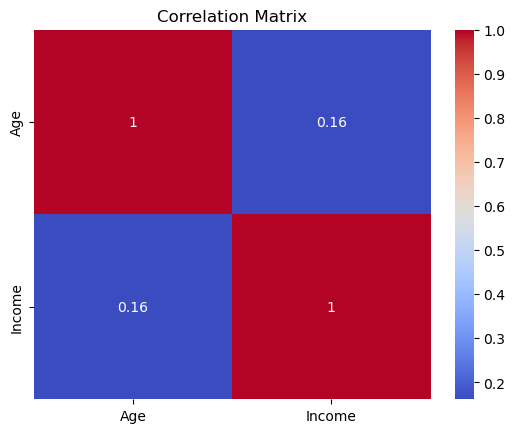

In [61]:
# Correlation Heatmap (Numerical Only)
corr = df[['Age', 'Income']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [40]:
summary = pd.DataFrame({
    'Missing %': df.isnull().mean() * 100,
    'Unique Values': df.nunique(),
    'Data Type': df.dtypes
})

summary


,Missing %,Unique Values,Data Type
ID,0.000000,2240,int64
Year_Birth,0.000000,59,int64
Education,0.000000,5,object
Marital_Status,0.000000,8,object
Income,1.071429,1974,float64
Kidhome,0.000000,3,int64
Teenhome,0.000000,3,int64
Dt_Customer,0.000000,663,object
Recency,0.000000,100,int64
MntWines,0.000000,776,int64
